In [1]:
!pip install qiskit
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.5 MB/s eta 0:00:00



🧩 Oracle Type: Constant-0
Measurement Results: {'000': 1024}


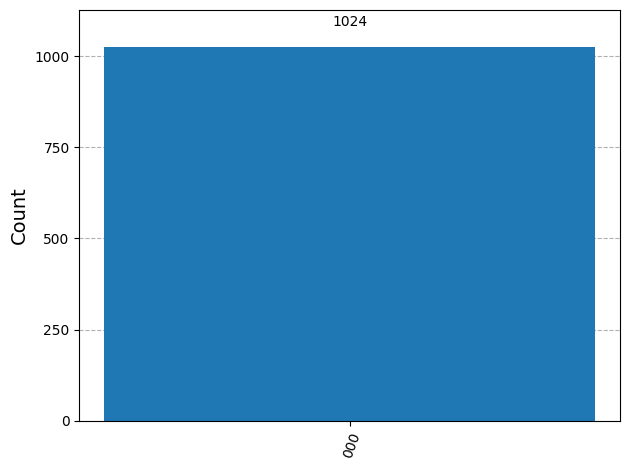

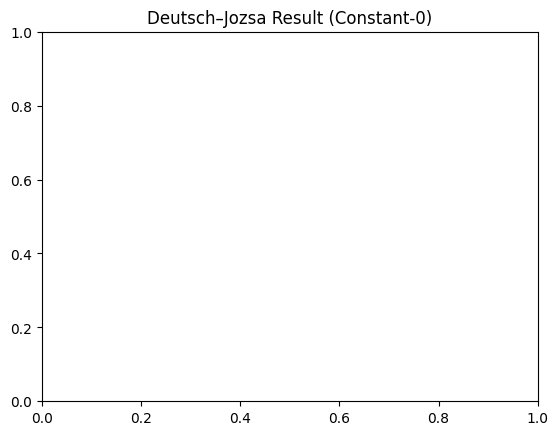


🧩 Oracle Type: Constant-1
Measurement Results: {'000': 1024}


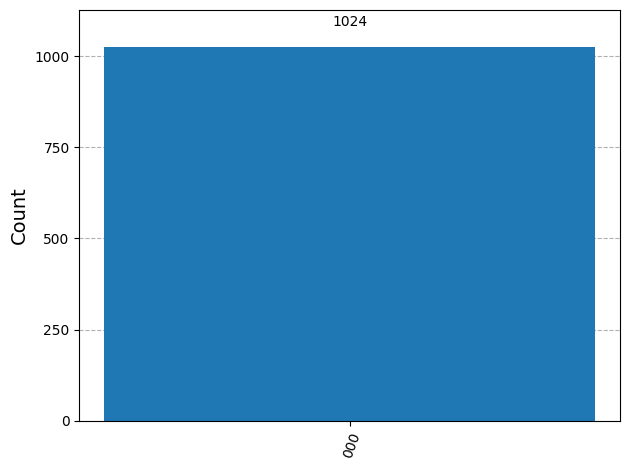

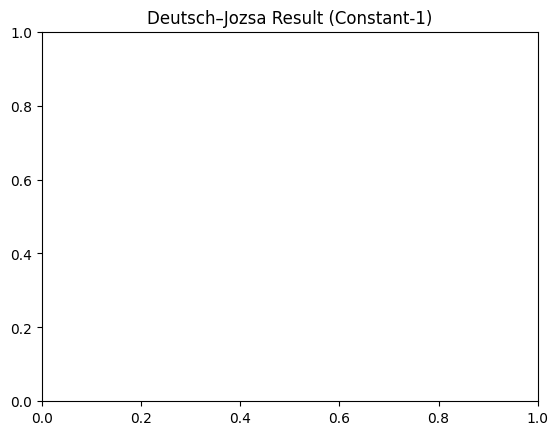


🧩 Oracle Type: Balanced
Measurement Results: {'001': 1024}


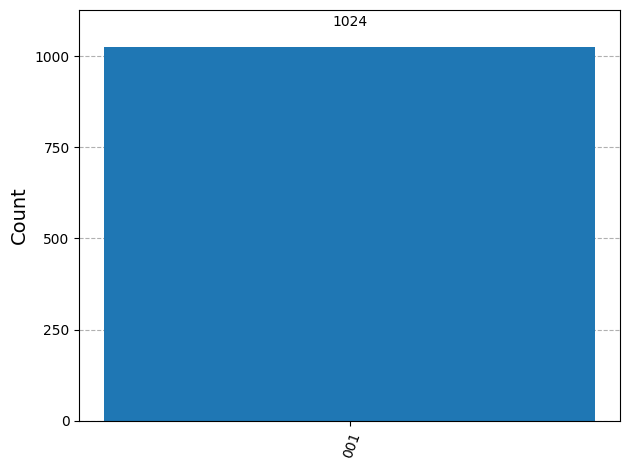

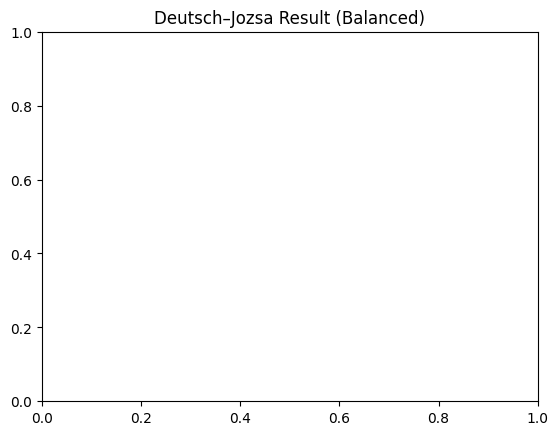

{'001': 1024}

In [7]:

# Step 2: Import Libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 3: Define oracles
def constant_oracle(n, output=0):
    """
    Constant oracle: output is always 0 or 1.
    If output=1, flip the ancilla bit.
    """
    qc = QuantumCircuit(n + 1)
    if output == 1:
        qc.x(n)  # flip ancilla if constant 1
    return qc

def balanced_oracle(n):
    """
    Balanced oracle: flips the ancilla for half the inputs.
    Example: if MSB == 1, flip ancilla.
    """
    qc = QuantumCircuit(n + 1)
    qc.cx(0, n)  # Control: first qubit, Target: ancilla
    return qc

# Step 4: Deutsch–Jozsa circuit builder
def deutsch_jozsa(n, oracle):
    qc = QuantumCircuit(n + 1, n)

    # Step 1: Prepare |0>^n |1>
    qc.x(n)
    qc.barrier()

    # Step 2: Apply Hadamard to all qubits
    for qubit in range(n + 1):
        qc.h(qubit)
    qc.barrier()

    # Step 3: Apply oracle
    qc.append(oracle, range(n + 1))
    qc.barrier()

    # Step 4: Apply Hadamard to input qubits again
    for qubit in range(n):
        qc.h(qubit)
    qc.barrier()

    # Step 5: Measure input qubits
    qc.measure(range(n), range(n))
    return qc

# Step 5: Run function on simulator
def run_dj(n, oracle_type="constant", constant_value=0):
    if oracle_type == "constant":
        oracle = constant_oracle(n, constant_value).to_gate()
        label = f"Constant-{constant_value}"
    else:
        oracle = balanced_oracle(n).to_gate()
        label = "Balanced"

    qc = deutsch_jozsa(n, oracle)
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    print(f"\n🧩 Oracle Type: {label}")
    print("Measurement Results:", counts)
    display(plot_histogram(counts))
    plt.title(f"Deutsch–Jozsa Result ({label})")
    plt.show()
    return counts

# Step 6: Run both cases
n = 3  # Number of input qubits

# Case 1: Constant oracle (output always 0)
run_dj(n, oracle_type="constant", constant_value=0)

# Case 2: Constant oracle (output always 1)
run_dj(n, oracle_type="constant", constant_value=1)

# Case 3: Balanced oracle
run_dj(n, oracle_type="balanced")
